<a href="https://colab.research.google.com/github/Hesh0629/pandas_study/blob/main/matplot_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이용한지는 오래됬지만 그래도 다시 공부해보는 matplotlib  
#### 한글 폰트의 이용을 위하여 꼭 아래 코드를 실행하자

In [ ]:
## matplot의 폰트변경을 위하여 1회 실행시켜주고 런타임 다시시작 진행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import sys
sys.path.insert(0, '/content/drive/MyDrive/additional_package')

In [3]:
path='/content/drive/MyDrive/판다스 책/part4/시도별 전출입 인구수.xlsx'
df=pd.read_excel(path,header=0)

#### 데이터 프레임을 마스킹 하는 방법.
####조건에 맞는 행을 골라서 필터링한다

In [30]:
df=df.fillna(method='ffill')
mask=(df['전출지별']=='서울특별시') & (df['전입지별'] !='서울특별시')
df_seoul=df[mask]

In [140]:
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)

In [139]:
sr_one=df_seoul.loc['경기도']
sr_one.head(20)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
Name: 경기도, dtype: object

### 그래프 그리기 시간이 돌아왔어요~  
#### 제발 plot은 마지막에 두자

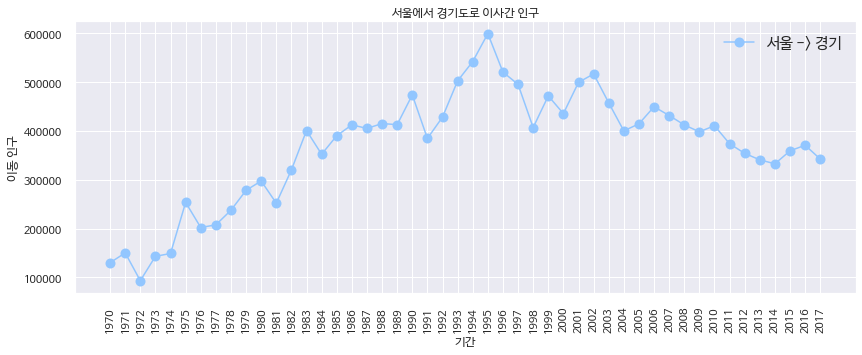

In [98]:
rc('font',family='NanumBarunGothic') # 한글깨짐 방지용
plt.rcParams['axes.unicode_minus'] = False # 음수 깨짐 방지용
plt.style.use('seaborn-pastel') #이상하게 다른 seaborn 스타일만 쓰면 한글이 깨진다.
plt.figure(figsize=(14,5)) # plt 사이즈 조정
plt.xticks(rotation='vertical') # 숫자도 수직으로 잘보이게 조정해주고
plt.title('서울에서 경기도로 이사간 인구',)
plt.xlabel('기간')
plt.ylabel('이동 인구')
plt.plot(sr_one.index, sr_one.values, marker='o',markersize=10) # == plt.plot(sr_one) 자동으로 x축은 인덱스 y축은 values
plt.legend(labels=['서울 -> 경기'],loc='best',fontsize=15) # loc으로 위치를 조정하는데 best로 두면 최적의 위치를 계산해줌
plt.show()

####이유는 모르겠지만 matplotlib에서 figsize 설정을해도 seaborn에 먹힌다  
##### 그런데 x축 저거 안고쳐진다

<function matplotlib.pyplot.show>

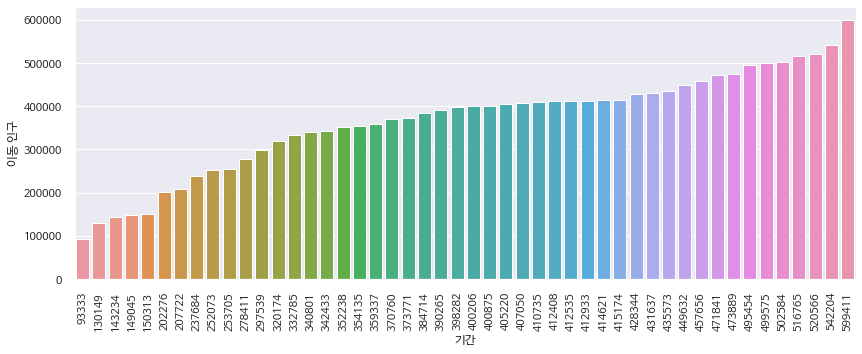

In [87]:
import seaborn as sns
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical') 
sns.barplot(x=sr_one.index,
            y=sr_one.values,
            data=sr_one)
plt.xlabel('기간')
plt.ylabel('이동 인구')
plt.show

### axe 객체를 활용하여 화면 분할이 가능하다
##### 일반 plt항목에서 set_을 더하면 보통 함수명이 맞다

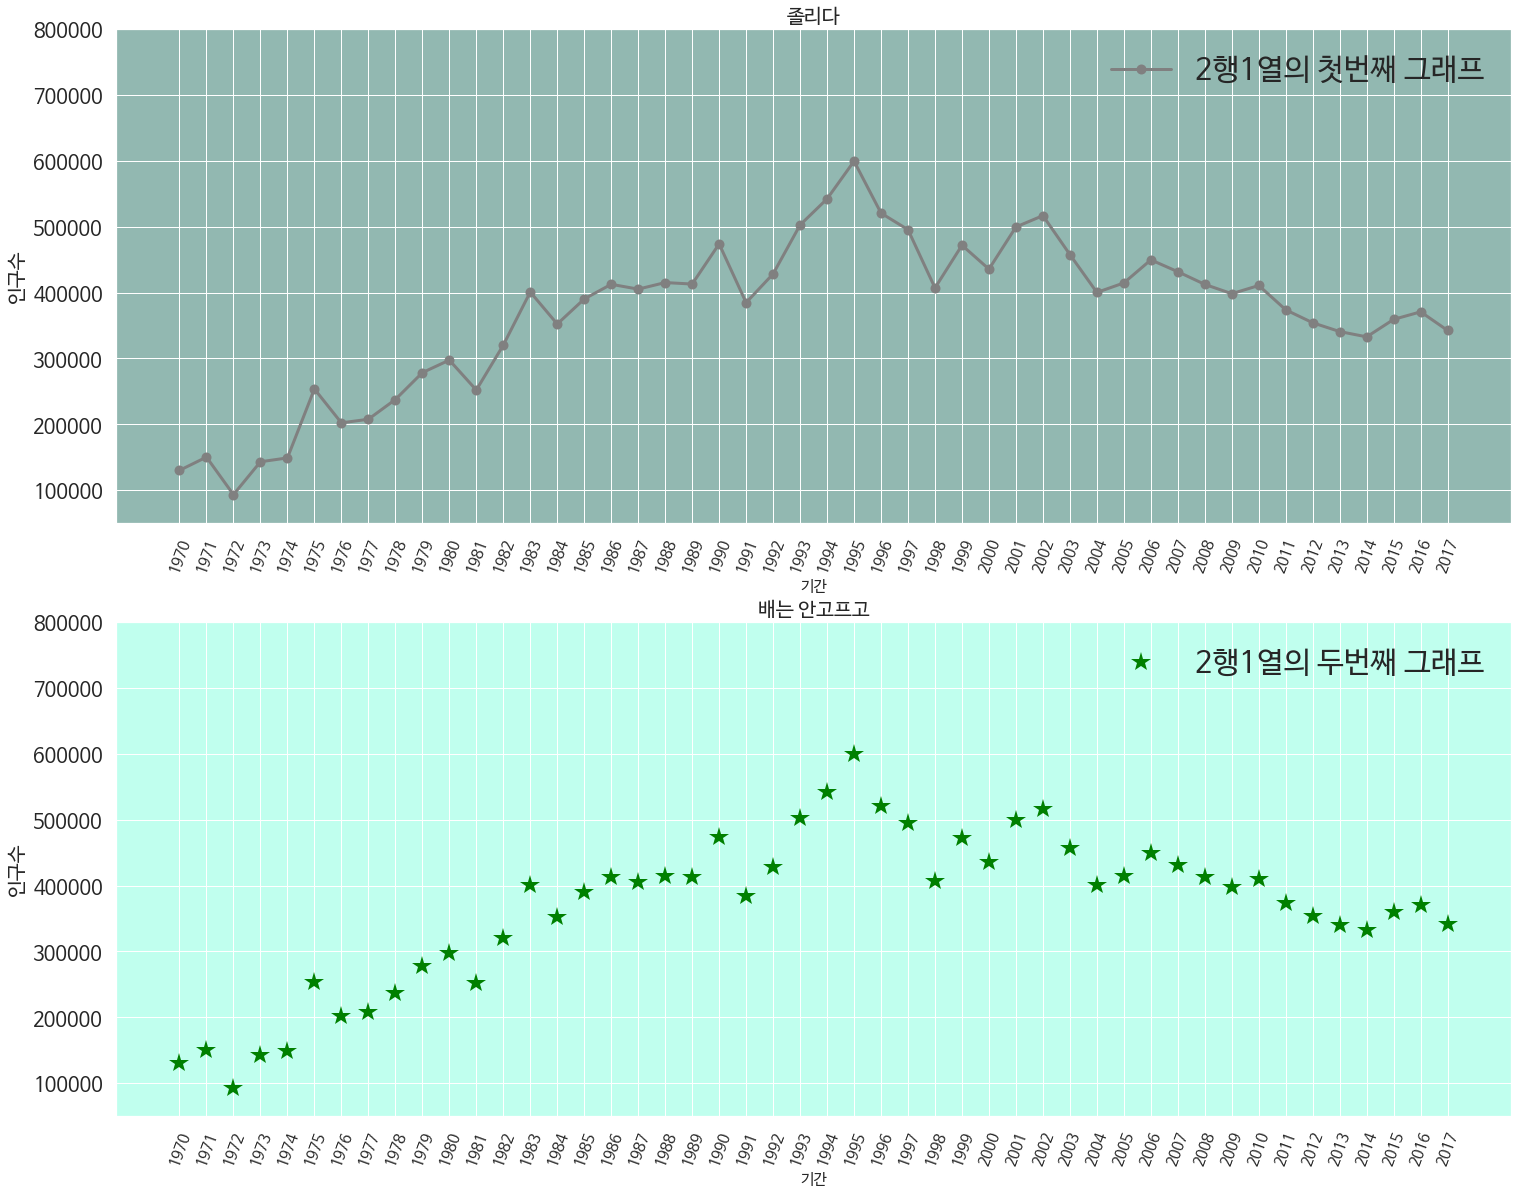

In [144]:
fig=plt.figure(figsize=(25,20)) # 참고로 반환형은 fig객체이다
ax1=fig.add_subplot(2,1,1) # 2행 1열의 첫번째 값을 의미
ax2=fig.add_subplot(2,1,2)
# y축의 상한과 하한을 정한다.
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# x축 라벨을 설정해주고 크기 기울기 조정
ax1.set_xticklabels(sr_one.index, size=10,rotation=70)
ax2.set_xticklabels(sr_one.index, size=10,rotation=70)

# 타이틀 x라벨 y라벨 이름, 폰트크기 설정
ax1.set_title('졸리다',size=20)
ax2.set_title('배는 안고프고',size=20)
ax1.set_xlabel('기간',size=15)
ax2.set_xlabel('기간',size=15)
ax1.set_ylabel('인구수',size=20)
ax2.set_ylabel('인구수',size=20)

#민트색은 C0FFEE
ax1.set_facecolor('#92B8B1')
ax2.set_facecolor('#C0FFEE')

# x,y라벨의 크기 설정
ax1.tick_params(axis="x",labelsize=15)
ax2.tick_params(axis="x",labelsize=15)
ax1.tick_params(axis="y",labelsize=20)
ax2.tick_params(axis="y",labelsize=20)

# 대망의 plot. 여기는 axe객체라고해서 기존과 다를게 없더라
ax1.plot(sr_one.index, sr_one.values, marker='o',markersize=10,color='gray',linewidth=3,label='2행1열의 첫번째 그래프')
ax2.plot(sr_one.index, sr_one.values, '*',markersize=20,color='green',linewidth=5,label='2행1열의 두번째 그래프')
ax1.legend(loc='best', fontsize=30)
ax2.legend(loc='best', fontsize=30)
plt.show()

## 한번에 그리기도 된다 (당연히도)

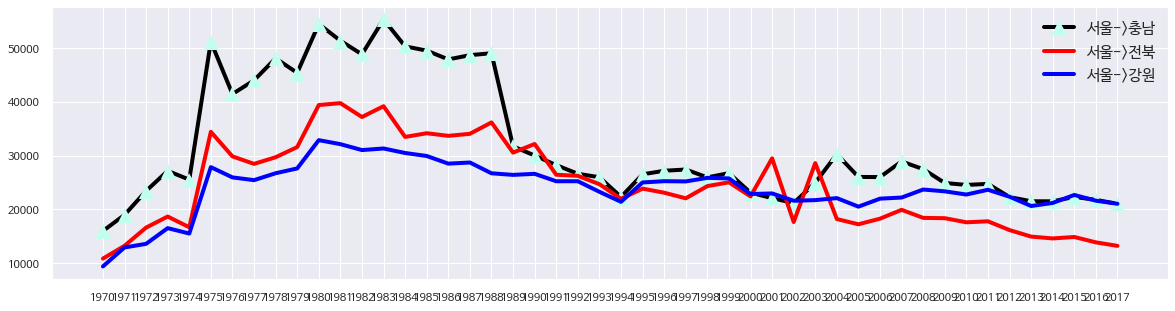

In [155]:
col_years = list(map(str,range(1970,2018))) #숫자 1970부터 2017까지 string형으로 변환
df_3=df_seoul.loc[['충청남도', '전라북도', '강원도'], col_years]
rc('font',family='NanumBarunGothic') # 한글깨짐 방지용
plt.rcParams['axes.unicode_minus'] = False # 음수 깨짐 방지용
fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='^',markerfacecolor='#C0FFEE',markersize=15,color='black',linewidth=4,label='서울->충남')
ax.plot(col_years,df_3.loc['전라북도',:],color='red', linewidth=4,label='서울->전북')
ax.plot(col_years,df_3.loc['강원도',:],color='blue', linewidth=4,label='서울->강원')
ax.legend(loc='best',fontsize=15)
plt.show()